/tmp/ipython-input-204301187.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all.index, y=all.values, palette="viridis")


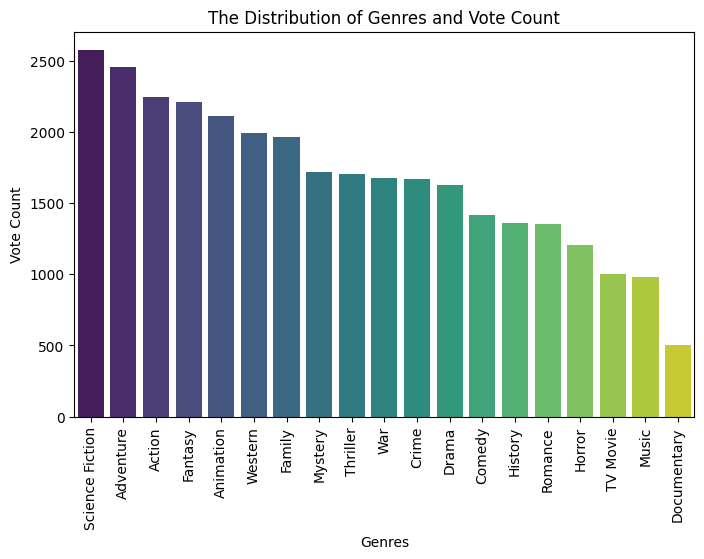

In [20]:
from re import T
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import ast

#vote_count vote_average budget revenue popularity release_date
df=pd.read_csv("https://raw.githubusercontent.com/CHAWisald/Movie-Recommendation-System/refs/heads/main/Notebooks/tmdb_5000_merged.csv")
list(df.columns)
df["genres"].value_counts()

df["genres"] = df["genres"].apply(ast.literal_eval)

df["genre_type"] = df["genres"].apply(lambda x: [d["name"] for d in x])

df_exploded = df.explode("genre_type")

filtered = df_exploded[df_exploded["vote_count"] > 500]

genre_popularity = (
    filtered.groupby("genre_type")["vote_count"]
    .mean()
    .sort_values(ascending=False)
)

all = genre_popularity.head(100)

plt.figure(figsize=(8,5))
sns.barplot(x=all.index, y=all.values, palette="viridis")
plt.title("The Distribution of Genres and Vote Count")
plt.xlabel("Genres")
plt.ylabel("Vote Count")
plt.xticks(rotation=90)
plt.show()





